# Waffle Plots
One alternative univariate plot type that you might see for categorical data is the waffle plot, also known as the square pie chart. While the standard pie chart uses a circle to represent the whole, a waffle plot is plotted onto a square divided into a 10x10 grid. Each small square in the grid represents one percent of the data, and a number of squares are colored by category to indicate total proportions. Compared to a pie chart, it is much easier to make precise assessments of relative frequencies.

There's no built-in function for waffle plots in Matplotlib or Seaborn, so we'll need to take some additional steps in order to build one with the tools available. First, we need to create a function to decide how many blocks to allocate to each category. The function below, percentage_blocks, uses a rule where each category gets a number of blocks equal to the number of full percentage points it covers. The remaining blocks to get to the full one hundred are assigned to the categories with the largest fractional parts.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

pokemon = pd.read_csv('pokemon.csv')

pokemon.generation_id = pokemon.generation_id.astype(str)

pokemon.generation_id = ['gen' + gen_number for gen_number in pokemon.generation_id]

print(pokemon.shape)
pokemon.head(10)

(807, 14)


id     species generation_id  height  weight  base_experience type_1  \
0   1   bulbasaur          gen1     0.7     6.9               64  grass   
1   2     ivysaur          gen1     1.0    13.0              142  grass   
2   3    venusaur          gen1     2.0   100.0              236  grass   
3   4  charmander          gen1     0.6     8.5               62   fire   
4   5  charmeleon          gen1     1.1    19.0              142   fire   
5   6   charizard          gen1     1.7    90.5              240   fire   
6   7    squirtle          gen1     0.5     9.0               63  water   
7   8   wartortle          gen1     1.0    22.5              142  water   
8   9   blastoise          gen1     1.6    85.5              239  water   
9  10    caterpie          gen1     0.3     2.9               39    bug   

   type_2  hp  attack  defense  speed  special-attack  special-defense  
0  poison  45      49       49     45              65               65  
1  poison  60      62       63     60              80               80  
2  poison  80      82       83     80             100              100  
3     NaN  39      52       43     65              60               50  
4     NaN  58      64       58     80              80               65  
5  flying  78      84       78    100             109               85  
6     NaN  44      48       65     43              50               64  
7     NaN  59      63       80     58              65               80  
8     NaN  79      83      100     78              85              105  
9     NaN  45      30       35     45              20               20

In [2]:
def percentage_blocks(df, var):
    """
    Take as input a dataframe and variable, and return a Pandas series with
    approximate percentage values for filling out a waffle plot.
    """
    # compute base quotas
    percentages = 100 * df[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)

    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1

    return counts

Note that if we just rounded the proportions (center), we would round all of them up, ending up with a total of 101 blocks.

Now it's time to actually plot those counts as boxes in the waffle plot form. To do this, we'll make use of Matplotlib's bar function. We could have used this function earlier in the lesson to create our bar charts instead of Seaborn's countplot, but it would have required us to aggregate the data first to get the height of each bar. For the case of the waffle plot, we're going to specify the x- and y- coordinates of the boxes, and set their widths and heights to be equal, to create squares. The initial plotting code looks like this:

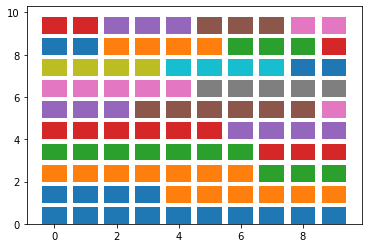

In [3]:
waffle_counts = percentage_blocks(pokemon, 'type_1')

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts[cat]

The blocks are drawn from left to right, bottom to top, using the ones and tens digits for numbers from 0 to 99 to specify the x- and y- positions, respectively. A loop is used to call the bar function once for each category; each time it is called, the plotted bars are assigned a different color.

The last steps that we need to do involve aesthetic cleaning to polish it up for interpretability. We can take away the plot border and ticks, since they're arbitrary, but we should change the limits so that the boxes are square. We should also add a legend so that the mapping from colors to category levels is clear.

(-0.8900000000000003, 9.89, 0.0, 10.780000000000001)

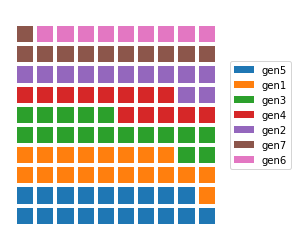

In [4]:
waffle_counts = percentage_blocks(pokemon, 'generation_id')

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts[cat]

# aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.5), loc = 6)
plt.axis('off')
plt.axis('square')

The two calls to Matplotlib's axis function make use of two convenience strings for arguments: 'off' removes the axis lines, ticks, and labels, while 'square' ensures that the scaling on each axis is equal within a square bounding box. As for the legend call, the first argument is a list of categories as obtained from the sorted waffle_counts Series variable. This will match each category to each bar call, in order. The "bbox_to_anchor" argument sets an anchor for the legend to the right side of the plot, and "loc = 6" positions the anchor to the center left of the legend. The final plot is as it looks at the top of the page:

Other variants of the waffle plot exist to extend it beyond just displaying probabilities. By associating each square with an amount rather than a percentage, we can use waffle plots to show absolute frequencies instead. This might cause us to end up with something other than 100 squares.



(-1.34, 19.340000000000003, 0.0, 20.680000000000003)

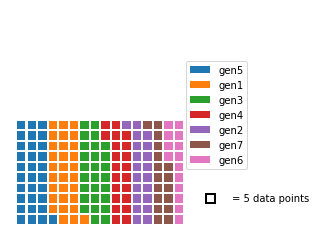

In [5]:
# each box represents five full counts
waffle_counts = (pokemon['generation_id'].value_counts() / 5).astype(int)

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10
    y = blocks // 10
    plt.bar(y, 0.8, 0.8, x)
    prev_count += waffle_counts[cat]

# box size legend
plt.bar(18, 0.8, 0.8, 2, color = 'white', edgecolor = 'black', lw = 2)
plt.text(20, 2.4,'= 5 data points', va = 'center')

# aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor = (0.8, 0.5), loc = 6)
plt.axis('off')
plt.axis('square')

In the above code, waffle_counts has been adjusted so that each box represents 5 data points. Most of the code is the same as before, though it should be noted that the x and y variables have been swapped in the bar function so that the boxes are plotted in columns from left to right. Additional bar and text calls have been added to the plot to act as an ad hoc legend. The positions of these elements, and the legend, have been adjusted manually through some trial and error to improve the aesthetic appeal. Note that this constitutes more of an explanatory polishing than it is a part of exploration!

As a further extension, there's no restriction against us using icons for each tally, rather than just squares. Infographics often take this approach, by having each icon represent some number of units (e.g. one person icon representing one million people). But while it can be tempting to use icons to represent values as a bit of visual flair, an icon-based plot contains more chart junk than a bar chart that conveys the same information. There’s a larger cognitive challenge in having to count a number of icons to understand the scale of a value, compared to just referencing a box's endpoint on a labeled axis.

One other downside of the waffle plot is that it is not commonly supported out of the box for most visualization libraries, including Matplotlib and Seaborn. The length of the demonstration code presented above is a testament to that. The effort required to create a meaningful and useful waffle plot means that it is best employed carefully as a part of explanatory visualizations. During the exploratory phase, you're better off using more traditional plots like the bar chart to more rapidly build your understanding of the data.

### Additional Resources
You don't actually need to go through all of the code wrangling shown above to create waffle plots in Python. The PyWaffle package can be used with Matplotlib's figure function to create waffle plots, with a few options for the orientation and order of icons, but you'll need to install it separately since it's not a major package. One of the main reasons why I didn't use it above is that the syntax for using it is very different from what you've seen and will see in this course. If you want to make use of the library, check out the examples on the linked GitHub page.